In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import triangle
%matplotlib inline
import gcBimodal

reload(gcBimodal)

<module 'gcBimodal' from 'gcBimodal.pyc'>

In [2]:
bimodal = gcBimodal.gcBimodal(22)

In [3]:
bimodal.runSampler(10000,burn_steps=5000)
bimodal.sampler.acceptance_fraction

gcBimodal.py:112: RuntimeWarning: invalid value encountered in double_scalars
  ln_prior_red = np.log(np.linalg.det(cov_matrix_red)**(-1.5))
gcBimodal.py:111: RuntimeWarning: invalid value encountered in double_scalars
  ln_prior_blue = np.log(np.linalg.det(cov_matrix_blue)**(-1.5))


mean_blue_gi median,  16 %, and  84 %  0.801233745286    0.785011793528    0.820117323844
mean_blue_ri median,  16 %, and  84 %  0.200539429031    0.194540374641    0.207975217071
sig^2_blue_gi median,  16 %, and  84 %  0.023773058611    0.0203920612296    0.0278944699294
sig^2_blue_ri median,  16 %, and  84 %  0.00300704370154    0.00252265742176    0.00368718628215
cov_blue median,  16 %, and  84 %  0.00730190817185    0.00605548715221    0.0089264578734
mean_red_gi median,  16 %, and  84 %  1.09054698575    1.08230679049    1.09820399939
mean_red_ri median,  16 %, and  84 %  0.329300681871    0.324799125967    0.333551609606
sig^2_red_gi median,  16 %, and  84 %  0.00401552918178    0.00324693600215    0.00489930438019
sig^2_red_ri median,  16 %, and  84 %  0.00111505443747    0.000910629514385    0.00136993797392
cov_red median,  16 %, and  84 %  0.0017323543774    0.00138595401337    0.00217538843259
f_blue median,  16 %, and  84 %  0.642489494718    0.600545780041    0.6860377874

array([ 0.3791,  0.3832,  0.3909,  0.4048,  0.3955,  0.3924,  0.3967,
        0.3883,  0.3905,  0.3918,  0.3851,  0.3739,  0.3911,  0.3862,
        0.395 ,  0.3894,  0.3966,  0.3861,  0.3891,  0.3889,  0.4005,
        0.3844])

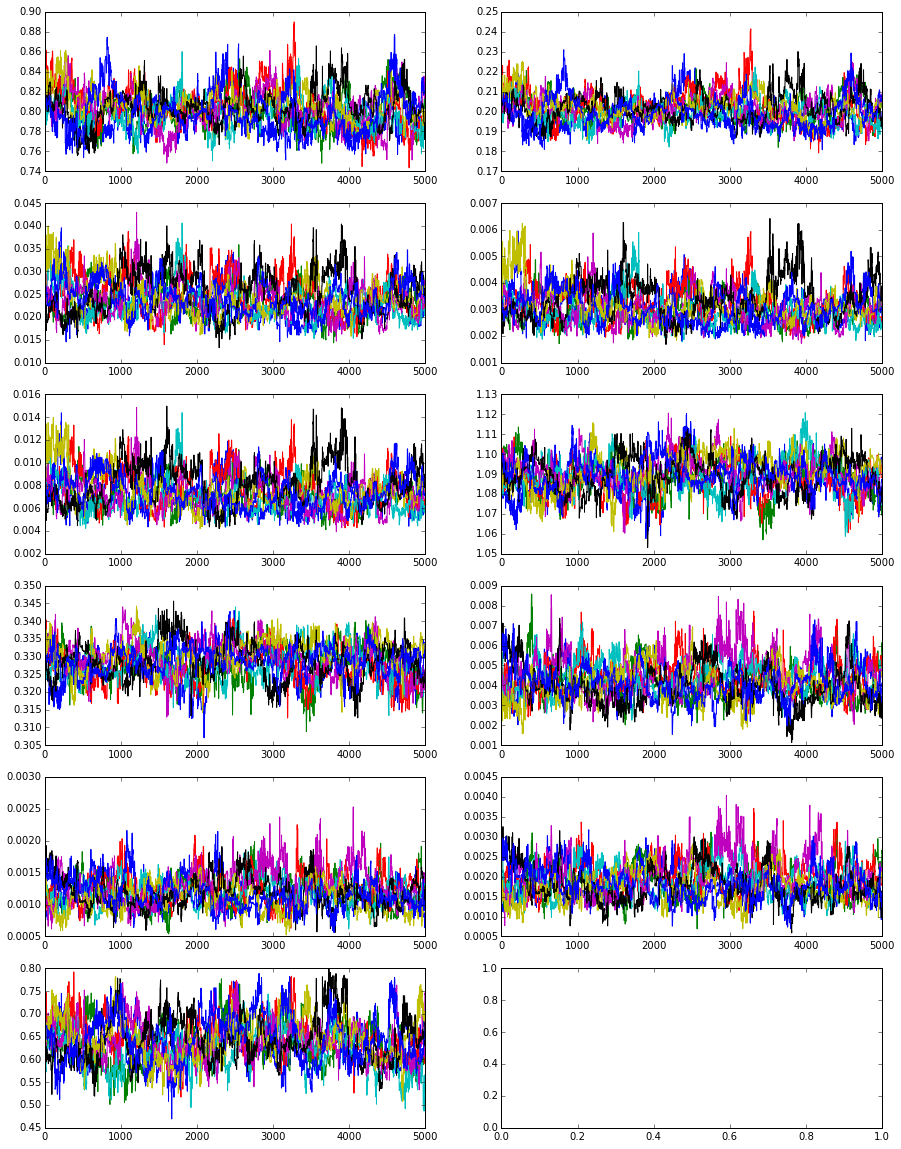

In [704]:
fig,ax = plt.subplots(figsize=(15,20),ncols=2,nrows=6)

for i in range(11):
    for j in range(8):
        ax[i/2,i%2].plot(bimodal.sampler.chain[2.*j+1,5000:,i])

Quantiles:
[(0.16, 0.78501179352834205), (0.5, 0.80123374528634672), (0.84, 0.82011732384448055)]
Quantiles:
[(0.16, 0.19454037464116206), (0.5, 0.20053942903138511), (0.84, 0.20797521707127825)]
Quantiles:
[(0.16, 0.020392061229554097), (0.5, 0.02377305861098581), (0.84, 0.027894469929371488)]
Quantiles:
[(0.16, 0.0025226574217588949), (0.5, 0.0030070437015356924), (0.84, 0.0036871862821507393)]
Quantiles:
[(0.16, 0.0060554871522143896), (0.5, 0.0073019081718535602), (0.84, 0.0089264578733980332)]
Quantiles:
[(0.16, 1.0823067904919117), (0.5, 1.0905469857544536), (0.84, 1.0982039993907911)]
Quantiles:
[(0.16, 0.32479912596730387), (0.5, 0.32930068187087347), (0.84, 0.33355160960588331)]
Quantiles:
[(0.16, 0.0032469360021476915), (0.5, 0.0040155291817828538), (0.84, 0.0048993043801857719)]
Quantiles:
[(0.16, 0.00091062951438476898), (0.5, 0.001115054437471921), (0.84, 0.0013699379739214221)]
Quantiles:
[(0.16, 0.0013859540133727929), (0.5, 0.0017323543773996729), (0.84, 0.0021753884325

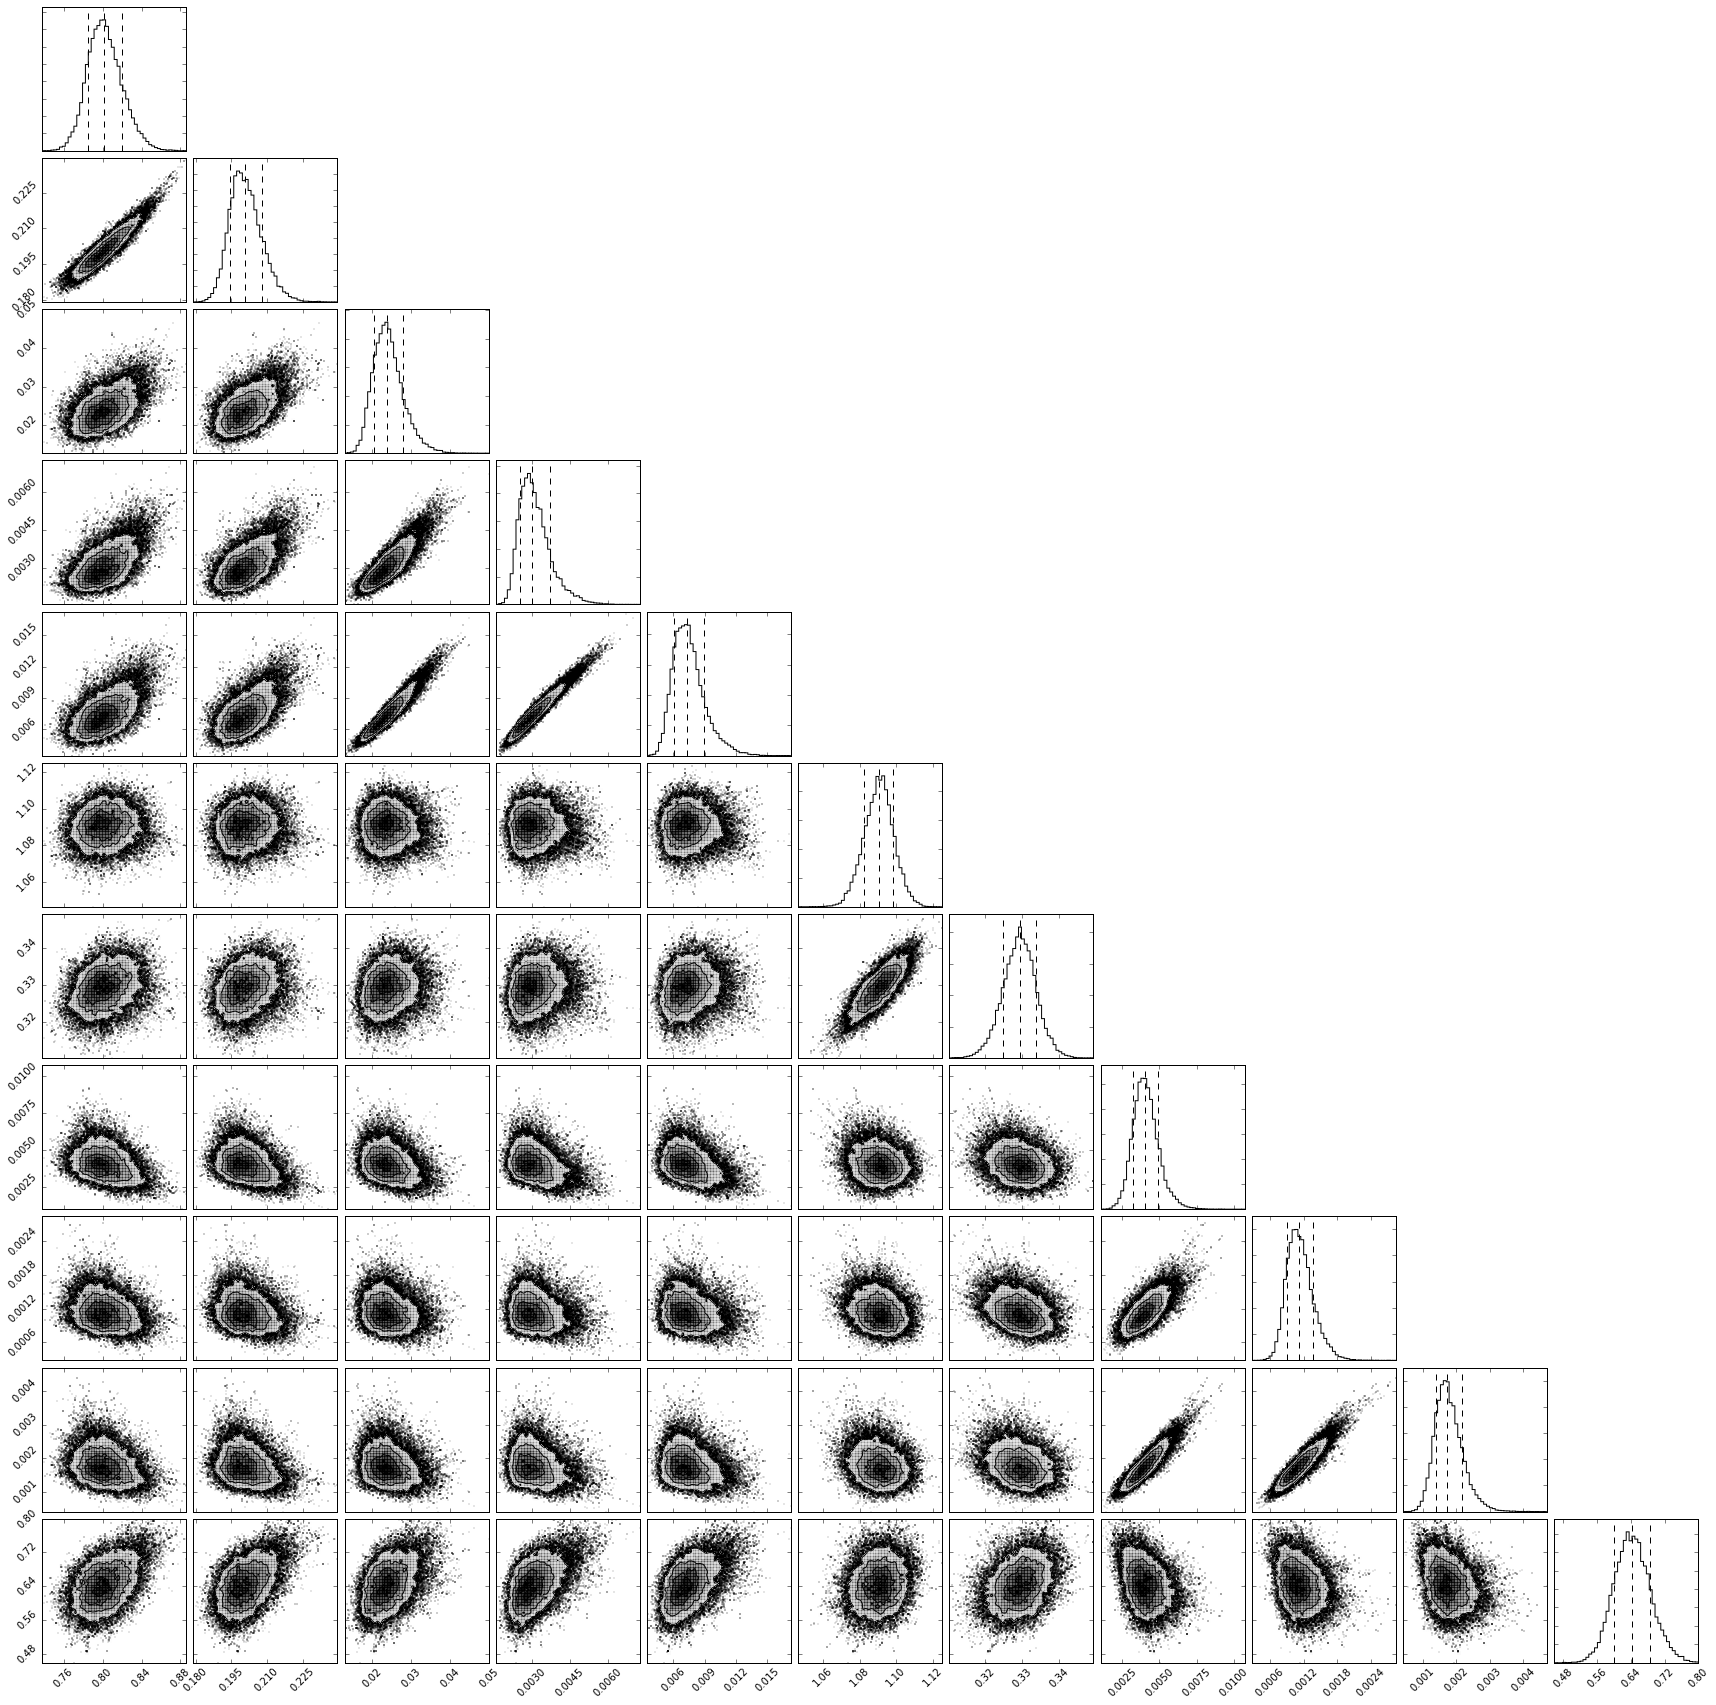

In [4]:
fig = triangle.corner(bimodal.chain.reshape(-1,11),\
                quantiles=[0.16, 0.5, 0.84])

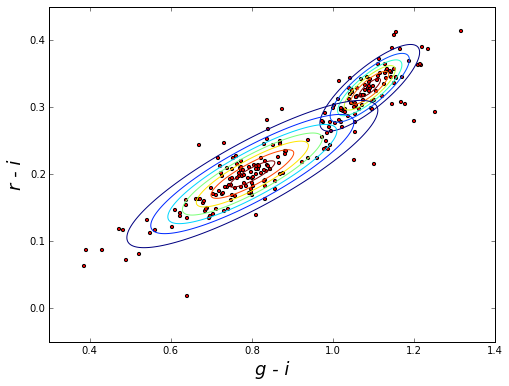

In [17]:
fig,axes = plt.subplots(figsize=(8,6))

med = bimodal.medians
x, y = np.mgrid[0.2:1.4:.001, -0.1:0.5:.001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv_red = stats.multivariate_normal([med[5], med[6]], [[med[7], med[9]], [med[9], med[8]]])
rv_blue = stats.multivariate_normal([med[0], med[1]], [[med[2], med[4]], [med[4], med[3]]])
axes.contour(x, y, rv_red.pdf(pos))
axes.contour(x, y, rv_blue.pdf(pos))

axes.scatter(bimodal.data[:,0],bimodal.data[:,1],s=10,c='r')
axes.set_xlabel('g - i',fontsize=18,fontstyle='italic')
axes.set_ylabel('r - i',fontsize=18,fontstyle='italic')
axes.set(xlim=(0.3,1.4),ylim=(-0.05,0.45))
fig.savefig('n3115_bimodality.pdf')

In [7]:
bimodal.data.shape

(235, 2)

In [699]:
ax.shape

(6, 2)

In [114]:
stats.multivariate_normal.pdf(bimodal.data,mean=bimodal.mean_red,cov=bimodal.cov_matrix_red)

ValueError: the input matrix must be positive semidefinite

In [163]:
np.dot(np.dot(np.subtract(bimodal.data,bimodal.mean_blue),np.linalg.inv(bimodal.cov_matrix_red)),\
       (bimodal.data - bimodal.mean_blue))

array([[-63.21934852,  16.05351584, -48.87218744, ..., -51.90170609,
         44.1994849 , -43.06374459],
       [ 16.05351584,  -4.07472216,  12.40462477, ...,  13.14423293,
        -11.20616858,  10.87562625],
       [-48.87218744,  12.40462477, -37.76322501, ..., -40.01202306,
         34.11360237, -33.10333037],
       ..., 
       [-51.90170609,  13.14423293, -40.01202306, ..., -41.91760141,
         35.94271553, -34.18478732],
       [ 44.1994849 , -11.20616858,  34.11360237, ...,  35.94271553,
        -30.73088176,  29.52668541],
       [-43.06374459,  10.87562625, -33.10333037, ..., -34.18478732,
         29.52668541, -27.35892014]])

In [270]:
data = bimodal.data[0:4,:]
diff = data - bimodal.mean_red
inv_cov = np.linalg.inv(bimodal.cov_matrix_blue)

#np.tensordot(diff,np.tensordot(inv_cov,diff.T,axes=2))

pdf = np.zeros(4)
for i in np.arange(4):
    pdf[i] = np.dot((data[i,:] - bimodal.mean_red),np.dot(inv_cov,(data[i,:] - bimodal.mean_red).T))
    
print pdf,np.sum(pdf)

[  0.2713067    7.26290886   0.05017226  11.74125553] 19.3256433448


In [297]:
data.shape

(4, 2)

In [290]:
diff.shape

(4, 2)

In [709]:
foo = np.arange(5)
a = foo[3],foo[4]

In [717]:
help(stats.norm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(self, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default=1).
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



In [721]:
foo = np.arange(18).reshape((2,3,3))

In [726]:
for i in range(foo[:,0,0].size):
    print foo[i,:,:]

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 9 10 11]
 [12 13 14]
 [15 16 17]]
